In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter, StrMethodFormatter

Create a dataset indicating which of the four default tests were passed by which code:

In [2]:
data = pd.read_csv("ss21_processed_solutions/m0_data.csv")
tests = pd.read_csv("ss21_processed_solutions/passing_test.csv")

In [3]:
if len(tests)<len(data):
    print("NEED TO UPDATE THE PASSING TESTS FILE!")
else:
    test_results = tests.copy()
    test_results["num_tests_passed"] = test_results[["test_1", "test_2", "hidden_test_1", "hidden_test_2"]].sum(axis=1)
    test_results["%_tests_passed"] = test_results["num_tests_passed"]/4*100
    test_results["version"] = test_results["version"].fillna(test_results["source"])

### Differences in passing tests, by different sources/model versions:

In [4]:
mean_num_tests_passed = test_results.groupby("version").agg({"num_tests_passed":"mean", "%_tests_passed":"mean", "source":"min"}).reset_index().sort_values("%_tests_passed")

In [5]:
test_results.groupby("source").mean()

,test_1,test_2,hidden_test_1,hidden_test_2,num_tests_passed,%_tests_passed
source,,,,,,
bard,0.000000,0.000000,0.058824,0.000000,0.058824,1.470588
bing,0.142857,0.000000,0.535714,0.357143,1.035714,25.892857
gpt3.5,0.052632,0.000000,0.000000,0.210526,0.263158,6.578947
gpt4,0.645161,0.064516,0.032258,0.580645,1.322581,33.064516
student,0.980769,0.980769,0.980769,0.980769,3.923077,98.076923


In [6]:
test_results.groupby("version").mean()

,test_1,test_2,hidden_test_1,hidden_test_2,num_tests_passed,%_tests_passed
version,,,,,,
balanced,0.000000,0.000000,0.571429,0.571429,1.142857,28.571429
bard,0.000000,0.000000,0.058824,0.000000,0.058824,1.470588
creative,0.166667,0.000000,0.500000,0.250000,0.916667,22.916667
gpt3.5,0.052632,0.000000,0.000000,0.210526,0.263158,6.578947
gpt4,0.645161,0.064516,0.032258,0.580645,1.322581,33.064516
precise,0.222222,0.000000,0.555556,0.333333,1.111111,27.777778
student,0.980769,0.980769,0.980769,0.980769,3.923077,98.076923


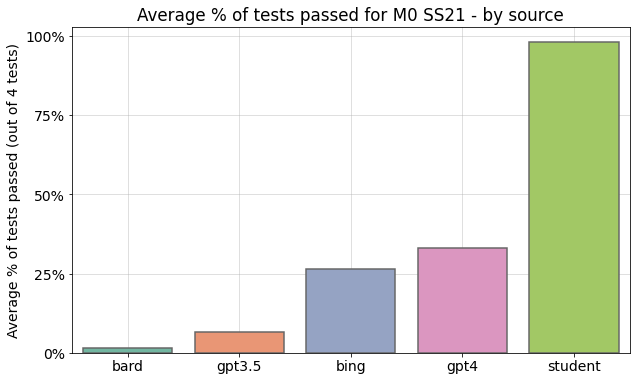

In [9]:
plt.rcParams.update({"font.size": 14})
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=mean_num_tests_passed, x="source", y="%_tests_passed",
            ci=None, zorder=2, linewidth=1.5, edgecolor="0.4", ax=ax)
ax.set_ylabel("Average % of tests passed (out of 4 tests)")
ax.set_xlabel("", labelpad=10)
ax.grid(zorder=-1, alpha=0.5)
ax.set_yticks([0, 25, 50, 75, 100])
ax.yaxis.set_major_formatter(StrMethodFormatter(u"{x}%"))
ax.set_title("Average % of tests passed for M0 SS21 - by source");

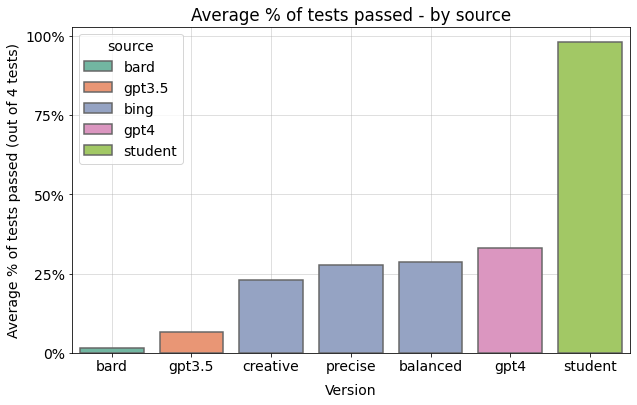

In [10]:
plt.rcParams.update({"font.size": 14})
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=mean_num_tests_passed, x="version", y="%_tests_passed", hue="source", 
            dodge=False, zorder=2, linewidth=1.5, edgecolor="0.4", ax=ax)
ax.set_ylabel("Average % of tests passed (out of 4 tests)")
ax.set_xlabel("Version", labelpad=10)
ax.grid(zorder=-1, alpha=0.5)
ax.set_yticks([0, 25, 50, 75, 100])
ax.yaxis.set_major_formatter(StrMethodFormatter(u"{x}%"))
ax.set_title("Average % of tests passed - by source");

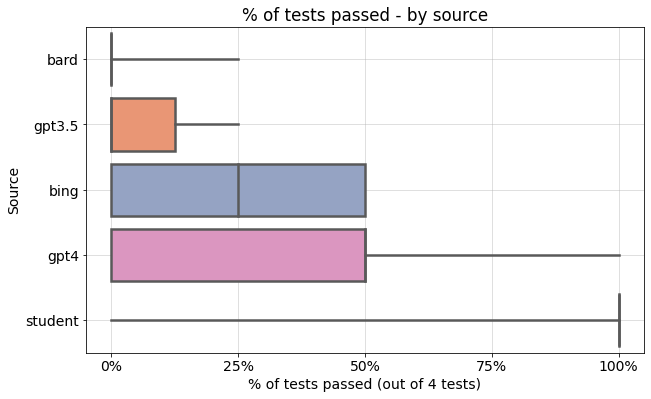

In [11]:
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=test_results, x="%_tests_passed", y="source", 
            whis=[0, 100], capprops={"alpha":0}, linewidth=2.5,
            order=["bard", "gpt3.5", "bing", "gpt4", "student"])
ax.set_axisbelow(True)
ax.grid(alpha=0.5)
ax.set_xticks([0, 25, 50, 75, 100])
ax.xaxis.set_major_formatter(StrMethodFormatter(u"{x}%"))
ax.set_xlabel("% of tests passed (out of 4 tests)")
ax.set_ylabel("Source")
ax.set_title("% of tests passed - by source");

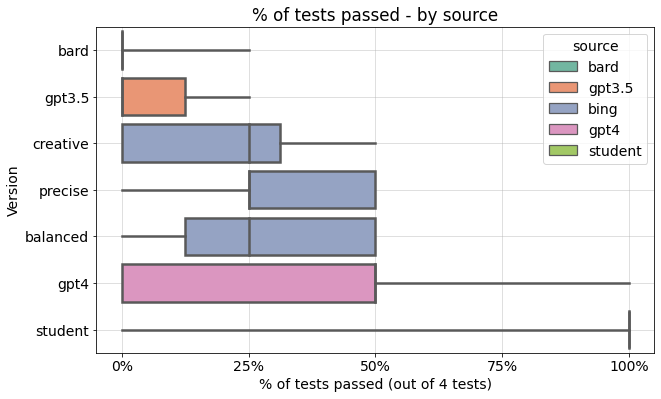

In [12]:
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=test_results, x="%_tests_passed", y="version", hue="source",
            dodge=False, whis=[0, 100], capprops={"alpha":0}, linewidth=2.5,
            order=["bard", "gpt3.5", "creative", "precise", "balanced", "gpt4", "student"],
            hue_order=["bard", "gpt3.5", "bing", "gpt4", "student"])
ax.set_axisbelow(True)
ax.grid(alpha=0.5)
ax.set_xticks([0, 25, 50, 75, 100])
ax.xaxis.set_major_formatter(StrMethodFormatter(u"{x}%"))
ax.set_xlabel("% of tests passed (out of 4 tests)")
ax.set_ylabel("Version")
ax.set_title("% of tests passed - by source");

### Differences in passing tests, by different styling prompts:

In [13]:
tests_passed_style = test_results.groupby("style").mean().reset_index().sort_values("%_tests_passed")

In [14]:
test_results.groupby("style").mean()

,test_1,test_2,hidden_test_1,hidden_test_2,num_tests_passed,%_tests_passed
style,,,,,,
cc,0.315789,0.000000,0.105263,0.315789,0.736842,18.421053
plain,0.244898,0.040816,0.142857,0.306122,0.734694,18.367347
styled,0.259259,0.000000,0.296296,0.407407,0.962963,24.074074


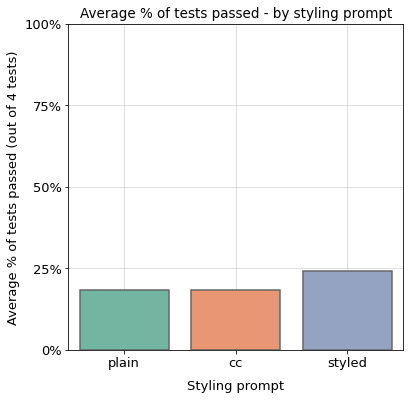

In [15]:
plt.rcParams.update({"font.size": 13})
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(data=tests_passed_style, x="style", y="%_tests_passed", 
            linewidth=1.5, edgecolor="0.4", zorder=2, ax=ax)
ax.set_ylabel("Average % of tests passed (out of 4 tests)")
ax.set_xlabel("Styling prompt", labelpad=10)
ax.grid(alpha=0.5, zorder=-2)
ax.set_yticks([0, 25, 50, 75, 100])
ax.yaxis.set_major_formatter(StrMethodFormatter(u"{x}%"))
ax.set_title("Average % of tests passed - by styling prompt", fontsize=13.5);

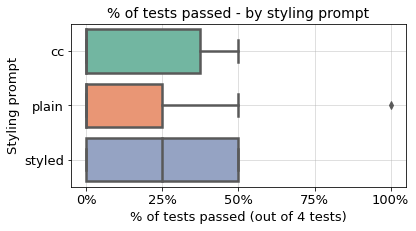

In [16]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(data=test_results, x="%_tests_passed", y="style", 
            dodge=False, whis=[0, 95], linewidth=2.5,
            order=["cc", "plain", "styled"])
ax.set_axisbelow(True)
ax.grid(alpha=0.5)
ax.set_xticks([0, 25, 50, 75, 100])
ax.xaxis.set_major_formatter(StrMethodFormatter(u"{x}%"))
ax.set_xlabel("% of tests passed (out of 4 tests)")
ax.set_ylabel("Styling prompt")
ax.set_title("% of tests passed - by styling prompt", fontsize=14);

### Differences in passing tests, by different styling prompts and sources:

Due to the very low sample sizes at this level of stratification, these results are extremely unreliable.

In [17]:
test_passed_ver_style = test_results.groupby(["source", "style"]).agg({"num_tests_passed":"mean", "%_tests_passed":"mean"}).reset_index().sort_values("%_tests_passed")

In [18]:
test_results.groupby(["source", "style"]).mean()

test_1    test_2  hidden_test_1  hidden_test_2  \
source style                                                      
bard   cc      0.000000  0.000000       0.000000       0.000000   
       plain   0.000000  0.000000       0.125000       0.000000   
       styled  0.000000  0.000000       0.000000       0.000000   
bing   cc      0.285714  0.000000       0.285714       0.428571   
       plain   0.166667  0.000000       0.416667       0.333333   
       styled  0.000000  0.000000       0.888889       0.333333   
gpt3.5 cc      0.000000  0.000000       0.000000       0.000000   
       plain   0.100000  0.000000       0.000000       0.200000   
       styled  0.000000  0.000000       0.000000       0.400000   
gpt4   cc      1.000000  0.000000       0.000000       0.750000   
       plain   0.473684  0.105263       0.052632       0.473684   
       styled  0.875000  0.000000       0.000000       0.750000   

               num_tests_passed  %_tests_passed  
source style                                     
bard   cc              0.000000        0.000000  
       plain           0.125000        3.125000  
       styled          0.000000        0.000000  
bing   cc              1.000000       25.000000  
       plain           0.916667       22.916667  
       styled          1.222222       30.555556  
gpt3.5 cc              0.000000        0.000000  
       plain           0.300000        7.500000  
       styled          0.400000       10.000000  
gpt4   cc              1.750000       43.750000  
       plain           1.105263       27.631579  
       styled          1.625000       40.625000

In [19]:
test_results.groupby(["source", "style"]).count()["name"]

source  style 
bard    cc         4
        plain      8
        styled     5
bing    cc         7
        plain     12
        styled     9
gpt3.5  cc         4
        plain     10
        styled     5
gpt4    cc         4
        plain     19
        styled     8
Name: name, dtype: int64

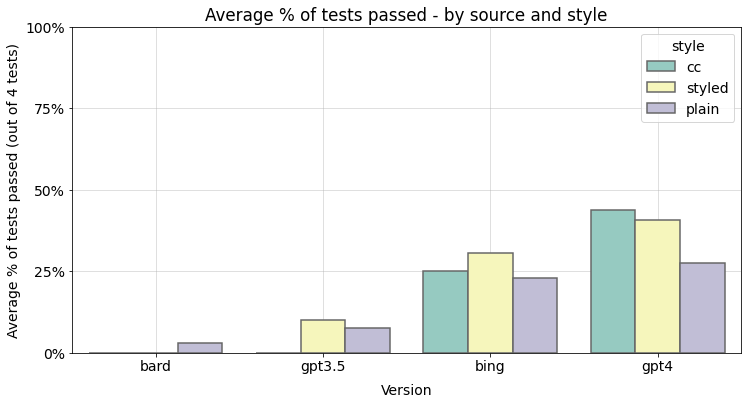

In [20]:
plt.rcParams.update({"font.size": 14})
sns.set_palette("Set3")
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=test_passed_ver_style, x="source", y="%_tests_passed", hue="style",
            zorder=2, linewidth=1.5, edgecolor="0.4", ax=ax)
ax.set_ylabel("Average % of tests passed (out of 4 tests)")
ax.set_xlabel("Version", labelpad=10)
ax.grid(zorder=-1, alpha=0.5)
ax.set_yticks([0, 25, 50, 75, 100])
ax.yaxis.set_major_formatter(StrMethodFormatter(u"{x}%"))
ax.set_title("Average % of tests passed - by source and style");